In [1]:
using CSV
using DataFrames
using Posets
using Plots
import Statistics: mean, median
using LaTeXStrings
using DelimitedFiles

In [9]:
posetrandom = Array( caminata_poset(30,10^2) )

30×30 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  1
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  1  0  0  0  0  0  0  …  0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [42]:
writedlm("ejemplofeo.dat", posetrandom)

In [43]:
;./script.wl ejemplofeo.dat

ejemplofeo.png


![ejemplo](ejemplofeo.png)

In [10]:
lista_extensioneslineales = [caminatale(posetrandom, 10^2) for _ in 1:10^3]|>unique!;

In [11]:
ranks_univs = lista_extensioneslineales[1:14]

14-element Array{Array{Int64,1},1}:
 [29, 27, 22, 21, 16, 20, 15, 26, 11, 23  …  18, 13, 9, 4, 19, 3, 28, 2, 1, 30]
 [29, 27, 22, 21, 20, 16, 15, 26, 11, 23  …  18, 13, 9, 4, 19, 3, 28, 2, 1, 30]
 [29, 27, 22, 21, 20, 16, 15, 26, 11, 7  …  18, 13, 9, 4, 19, 3, 28, 2, 1, 30]
 [29, 27, 15, 21, 20, 16, 26, 22, 11, 23  …  18, 13, 9, 4, 19, 3, 28, 2, 1, 30]
 [29, 27, 22, 21, 15, 16, 20, 26, 11, 23  …  18, 13, 3, 4, 19, 9, 28, 2, 1, 30]
 [29, 27, 22, 21, 20, 16, 15, 26, 11, 8  …  18, 13, 9, 4, 19, 3, 28, 2, 1, 30]
 [29, 27, 22, 21, 20, 16, 15, 26, 11, 23  …  18, 13, 4, 9, 19, 3, 28, 2, 1, 30]
 [15, 27, 22, 21, 20, 8, 29, 26, 11, 23  …  18, 13, 9, 4, 19, 3, 28, 2, 1, 30]
 [29, 27, 22, 21, 20, 16, 15, 26, 11, 23  …  3, 13, 9, 4, 19, 18, 28, 2, 1, 30]
 [29, 27, 22, 21, 20, 16, 15, 26, 11, 23  …  18, 13, 9, 4, 19, 12, 28, 2, 1, 30]
 [27, 29, 22, 21, 20, 16, 15, 26, 11, 23  …  18, 13, 9, 4, 19, 3, 28, 2, 1, 30]
 [29, 27, 22, 21, 20, 16, 15, 26, 11, 23  …  18, 1, 9, 4, 19, 3, 28, 2, 13, 30]
 [29, 

# Inicializacion

In [9]:
list_dataframes = [DataFrame(CSV.File("data/"*f)) for f in readdir("data")];

In [10]:
nombresbuenos = intersect([l.Univ for l in list_dataframes]...);
nombresbuenos = nombresbuenos[1:30];

In [11]:
data_filtrada = [xxx[([x ∈ nombresbuenos for x in xxx.Univ]),:] for xxx in list_dataframes];

In [12]:
puntuaciones = hcat([(sort(d, by = first).Points) for d in data_filtrada]...)/100;

In [13]:
ranks_univs = [sortperm(puntuaciones[:,x], rev = true) for x in 1:14]

14-element Array{Array{Int64,1},1}:
 [4, 11, 3, 28, 27, 6, 8, 30, 26, 2  …  18, 29, 17, 10, 16, 15, 9, 7, 5, 14]
 [4, 11, 28, 27, 6, 3, 8, 26, 2, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 28, 11, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 28, 11, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 7, 9, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  17, 5, 10, 16, 12, 29, 7, 9, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  17, 10, 5, 12, 16, 29, 7, 9, 15, 14]
 [4, 28, 11, 6, 27, 3, 8, 2, 26, 25  …  17, 10, 5, 12, 16, 7, 29, 14, 15, 9]
 [4, 11, 6, 28, 27, 3, 8, 2, 26, 25  …  17, 10, 12, 16, 5, 7, 29, 15, 9, 14]
 [4, 11, 6, 28, 27, 3, 8, 2, 26, 25  …  17, 10, 12, 5, 16, 7, 29, 9, 15, 14]
 [4, 11, 28, 6, 27, 3, 8, 2, 26, 25  …  18, 17, 12, 5, 16, 7, 29, 15, 9, 14]
 [4, 11, 6, 28, 27, 8, 3, 2, 25, 26  …  12, 18, 16, 17, 5, 7, 29, 9, 15, 14]
 [4, 11, 6, 28, 27, 8, 3, 2, 26, 25  …  

In [28]:
[sortperm(ranks_univs[x])[6] for x in 1:14]

14-element Array{Int64,1}:
 19
 19
 19
 19
 19
 19
 19
 19
 19
 19
 19
 19
 19
 19

# Grafica de posiciones

In [12]:
function parejapromvar(listaranks,nodo)
    (posicionpromedio(listaranks, nodo)
        ,2*posicionvarianza(listaranks,nodo) )
        #,sqrt(posicionvarianza(listaranks,nodo)) )
end

parejapromvar (generic function with 1 method)

In [13]:
function findinter(pi,vi,pj,vj)
    as = pi - vi/2
    ae = pi + vi/2
    bs = pj - vj/2
    be = pj + vj/2
    
    #@show as,ae, bs,be
    
    if bs > ae || as > be
        return 0.0
    else
        os = max(as,bs)
        oe = min(ae,be)
        return oe-os
    end
end

findinter (generic function with 1 method)

primeros cinco

In [14]:
using Statistics

In [36]:
function correlacion(ranks,l1,l2)
    pos1 = [r[l1] for r in ranks]
    pos2 = [r[l2] for r in ranks]
    #@show pos1
    xx = mean(pos1.*pos2) - mean(pos1)*mean(pos2)
    x1 = sqrt(mean(pos1.*pos1) - mean(pos1)^2)
    x2 = sqrt(mean(pos2.*pos2) - mean(pos2)^2)
    #@show x1, x2,xx
    xx/(x1*x2)
end

correlacion (generic function with 1 method)

In [37]:
x2= sortperm.(ranks_univs)
pos2 = [x[6] for x in x2]
sqrt(mean(pos2.*pos2) - mean(pos2)^2)

0.0

In [38]:
correlacion(sortperm.(ranks_univs),6,11)

NaN

In [39]:
sortperm.(ranks_univs)

14-element Array{Array{Int64,1},1}:
 [29, 28, 26, 24, 20, 19, 16, 13, 23, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 26, 24, 20, 19, 16, 13, 23, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 26, 24, 20, 19, 10, 13, 23, 11  …  4, 3, 16, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 26, 24, 20, 19, 16, 13, 23, 11  …  4, 8, 10, 12, 17, 7, 2, 27, 1, 30]
 [29, 28, 23, 24, 20, 19, 16, 13, 26, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 26, 24, 20, 19, 16, 10, 23, 11  …  4, 3, 13, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 26, 23, 20, 19, 16, 13, 24, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 26, 24, 20, 19, 16, 6, 23, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 7, 30]
 [29, 28, 21, 24, 20, 19, 16, 13, 23, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 18, 24, 20, 19, 16, 13, 23, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 1, 30]
 [29, 28, 26, 24, 20, 19, 16, 13, 23, 11  …  4, 3, 10, 12, 17, 8, 1, 27, 2, 30]
 [22, 28, 26, 24, 20, 19, 16, 13, 23, 11  …  4, 3, 10, 12, 17, 8, 2, 27, 1, 30]
 [29,

## Comparativa correlacion

In [40]:
matconci = zeros(Float64,10,10)

10×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [46]:
lista = [4,8,10,11,15, 1,3,5,7]
for (x,i) in enumerate(lista), (y,j) in enumerate(lista)
    matconci[x,y] = correlacion(sortperm.(ranks_univs), i,j)
end

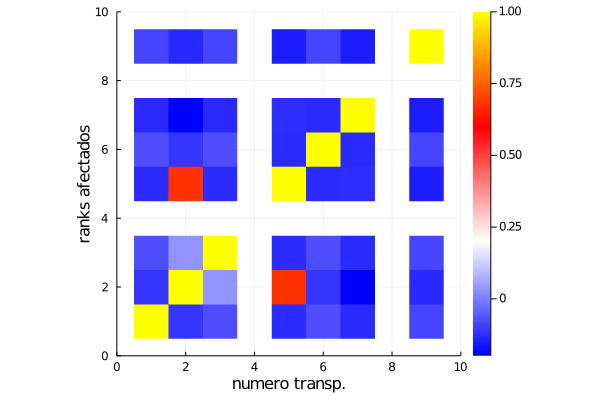

In [47]:
heatmap(1:size(matconci,1),
    1:size(matconci,2), matconci,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,10),ylim=(0,10))

## Comparativa traslape

In [48]:
xs =1:length(lista)

1:9

In [49]:
μs = [posicionpromedio(ranks_univs,x) for x in lista]

9-element Array{Float64,1}:
 23.928571428571427
 12.214285714285714
 10.285714285714286
  9.0
  6.142857142857142
 28.500000000000004
 24.857142857142854
 20.0
 15.499999999999998

In [52]:
σs = [sqrt(posicionvarianza(ranks_univs,x)) for x in lista]

9-element Array{Float64,1}:
 0.5074833759042341
 1.3771563894671703
 1.6048033425278503
 0.0
 1.3442528801570424
 1.3426748071413017
 1.5447280430312613
 0.0
 1.2437388284554365

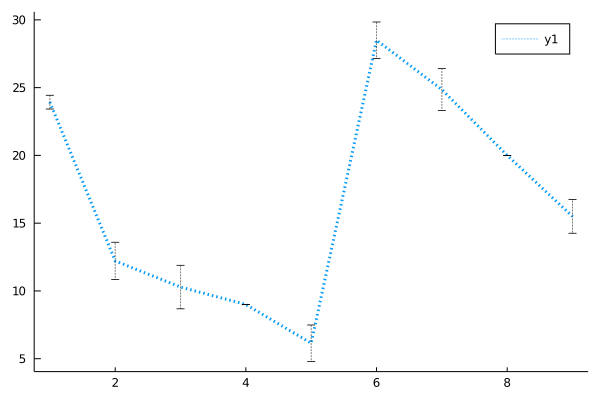

In [54]:
fig=plot(xs, μs, grid=false, yerror=σs,line = (:dot,3))

In [125]:
matconci = zeros(Float64,10,10)

10×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [126]:
lista = [6,11,27,28, 3, 2,8,26, 25,30]#[6,11,27,28,3]
for (x,i) in enumerate(lista), (y,j) in enumerate(lista)
    matconci[x,y] = findinter(parejapromvar(ranks_univs,i)...,parejapromvar(ranks_univs,j)...)
end

In [127]:
matconci

10×10 Array{Float64,2}:
 1.94307   0.0       1.0  0.499555  …  0.0       0.0       0.0
 0.0       0.820652  0.0  0.224062     0.0       0.0       0.0
 1.0       0.0       1.0  0.0          0.0       0.0       0.0
 0.499555  0.224062  0.0  1.48461      0.0       0.0       0.0
 0.289879  0.0       0.0  0.0          0.0       0.0       0.0
 0.0       0.0       0.0  0.0       …  0.593828  0.0       0.0
 0.0       0.0       0.0  0.0          0.0       0.0       0.0
 0.0       0.0       0.0  0.0          1.27775   0.0       0.0
 0.0       0.0       0.0  0.0          0.0       0.755929  0.364868
 0.0       0.0       0.0  0.0          0.0       0.364868  1.54524

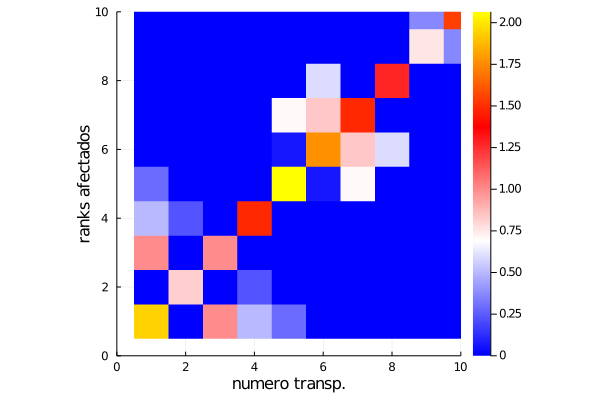

In [129]:
heatmap(1:size(matconci,1),
    1:size(matconci,2), matconci,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,10),ylim=(0,10))

## Comparativa. Menor es mejor

In [ ]:
;./script.wl figs/posetm3_univ_30.dat

![ejemplo](figs/poset0p95_univ_30.png)

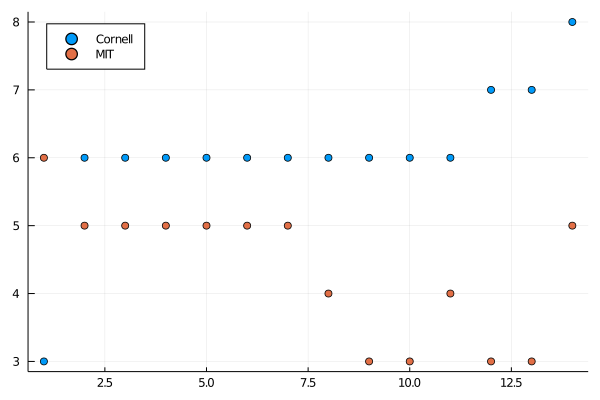

In [13]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[6] for x in 1:14]], labels = ["Cornell" "MIT"],legend=:topleft)

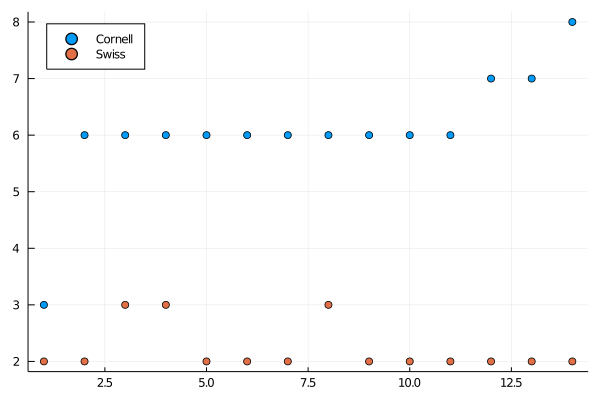

In [14]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["Cornell" "Swiss"],legend=:topleft)

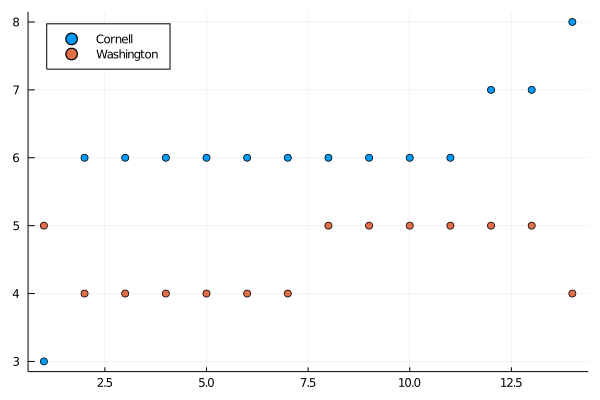

In [15]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[27] for x in 1:14]], labels = ["Cornell" "Washington"],legend=:topleft)

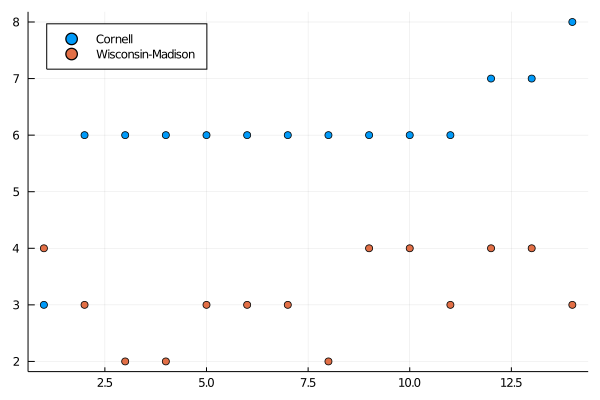

In [16]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Cornell" "Wisconsin-Madison"],legend=:topleft)

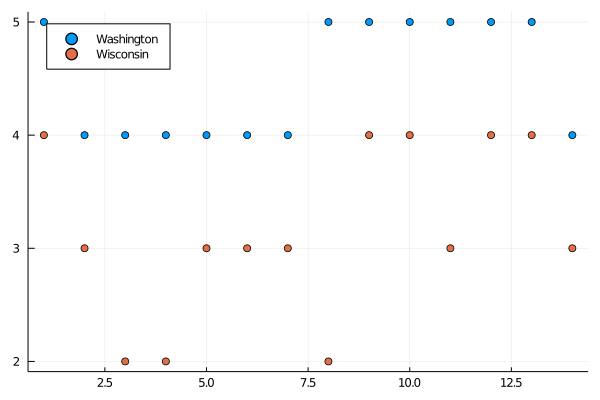

In [17]:
scatter([[sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Washington" "Wisconsin"],legend=:topleft)

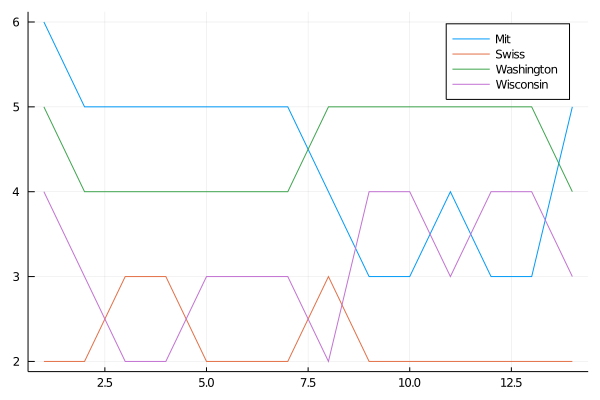

In [39]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14] [sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Mit" "Swiss" "Washington" "Wisconsin"],legend=:topright)

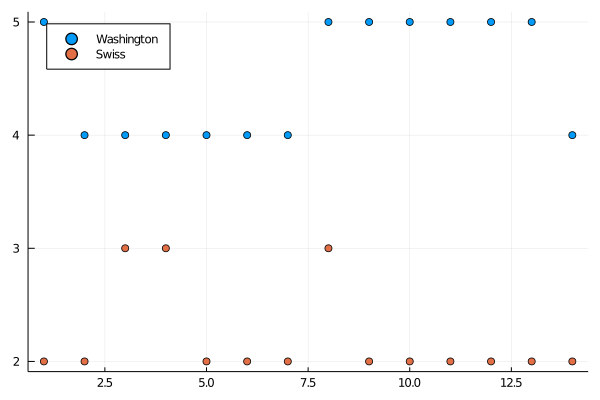

In [18]:
fig_e1 = scatter([[sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["Washington" "Swiss"],legend=:topleft)

En este caso, Washington vs Swiss, hay una relacion de superioridad Swiss < Washington.

In [38]:
savefig(fig_e1, "/home/david/grafica1.png")

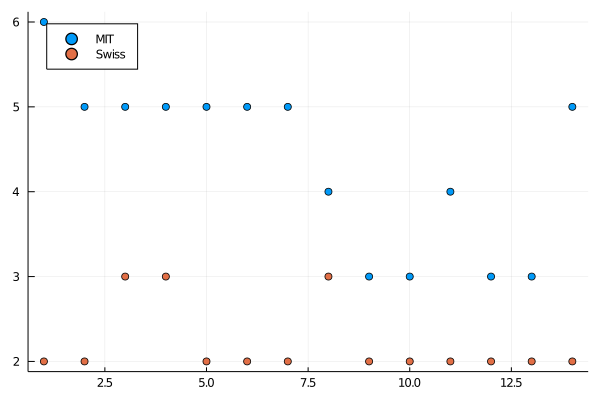

In [20]:
scatter([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft)

In [ ]:
plot(ys, color = [:black :orange], line = (:dot, 4), )

In [ ]:
marker = ([:hex :d], 12, 0.8, Plots.stroke(3, :gray))

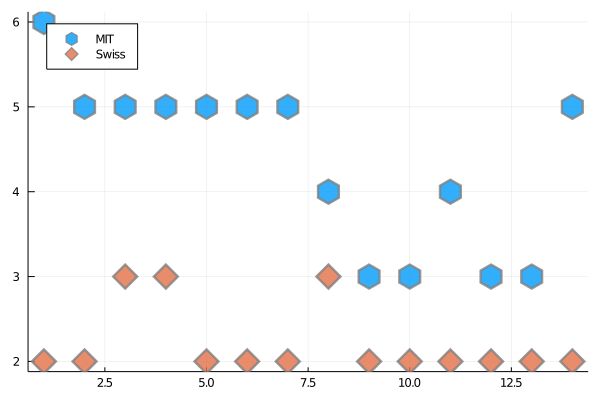

In [47]:
scatter([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft

,line = (:dot,4)
,marker = ([:hex :d], 12, 0.8, Plots.stroke(3, :gray)))

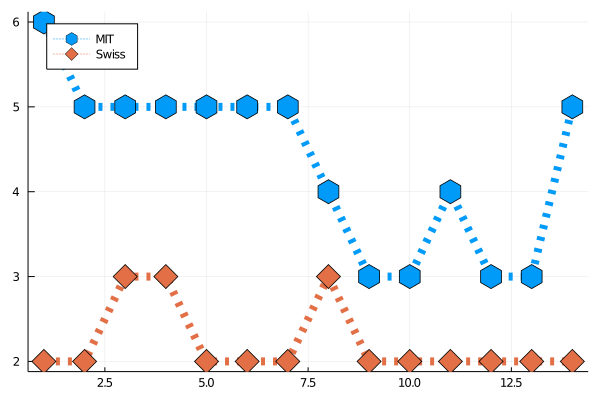

In [56]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft
,line = (:dot,8)
,marker = ([:hex :d], 12))

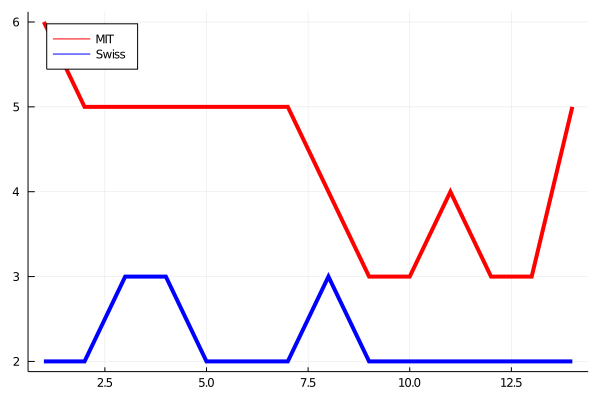

In [42]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft
,linewidth=[4 4]
,linecolor = [:red :blue])